In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
## 1) Data Pre-Processing

In [2]:
# loading data
data = pd.read_csv('sensor.csv')

In [3]:
# take a quick look at dataframe
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
status_counts = data['machine_status'].value_counts()
print(status_counts)

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


In [5]:
data.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [7]:
## I really want to remove some rows which are empty so that i get proper output
data = data.drop('Unnamed: 0', axis =1)
data = data.drop('sensor_00', axis =1)
data = data.drop('sensor_51', axis =1)
data = data.drop('sensor_15', axis =1)
data = data.drop('sensor_50', axis =1)

In [9]:
data.head()

,timestamp,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
0,2018-04-01 00:00:00,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
1,2018-04-01 00:01:00,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2,2018-04-01 00:02:00,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL
3,2018-04-01 00:03:00,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL
4,2018-04-01 00:04:00,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL


In [10]:
data = data.drop('timestamp', axis =1)

In [11]:
data.head()

,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
0,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
1,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,...,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL
3,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,...,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL
4,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,...,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL


In [ ]:
## 2) Exploratory Data Analysis (EDA)

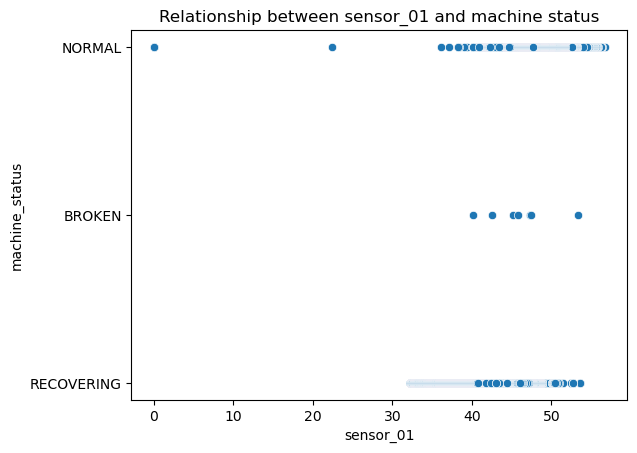

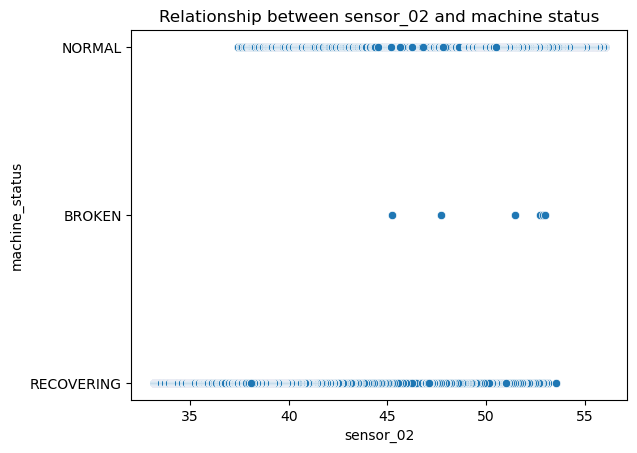

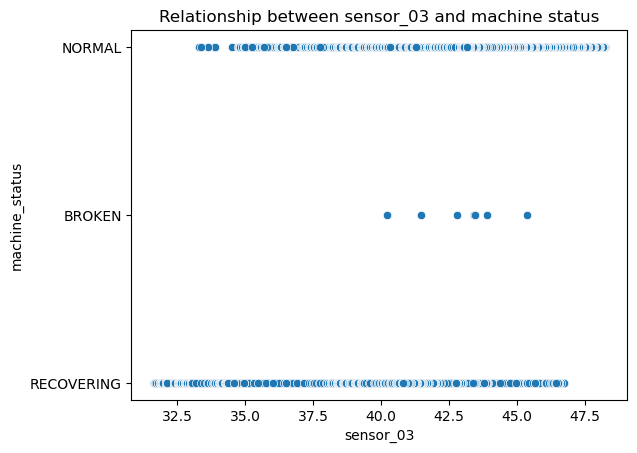

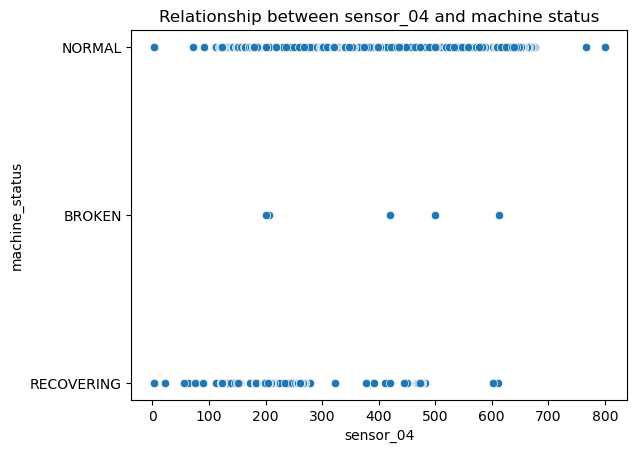

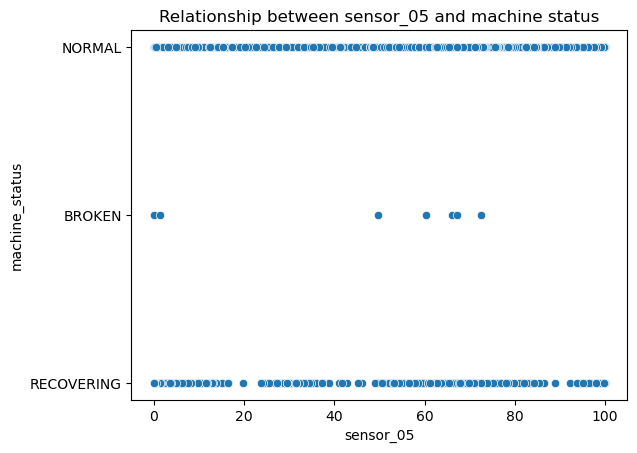

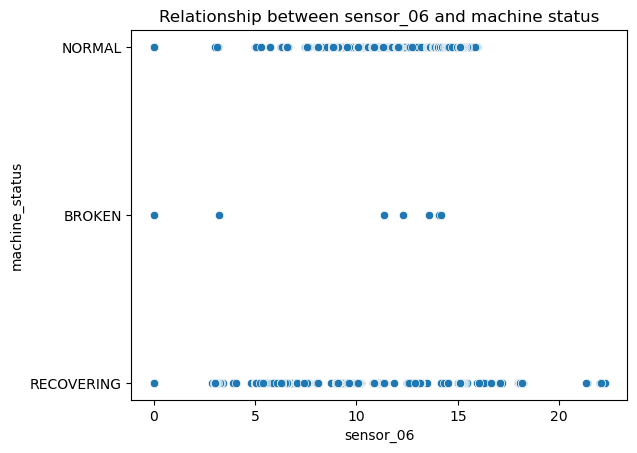

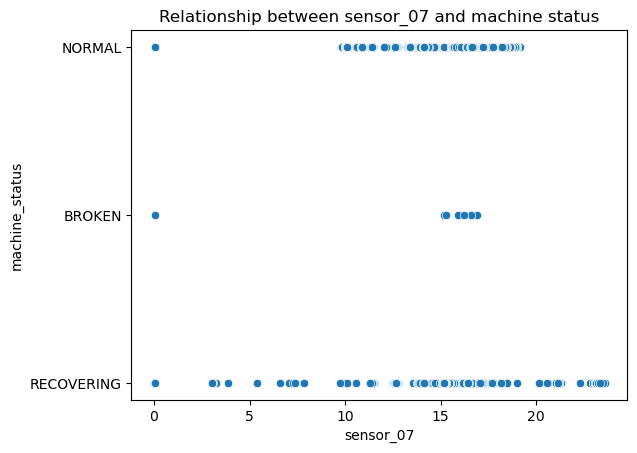

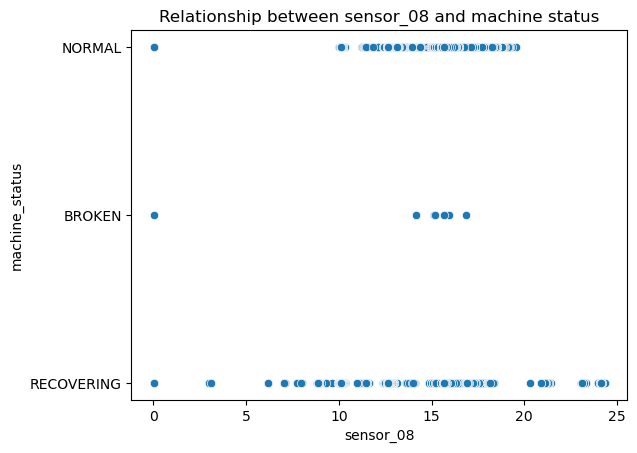

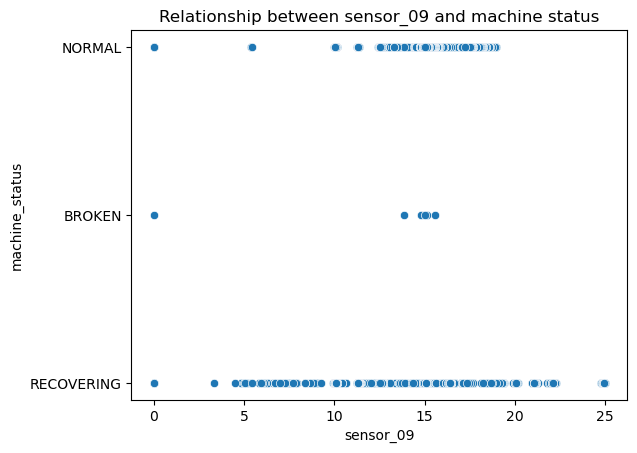

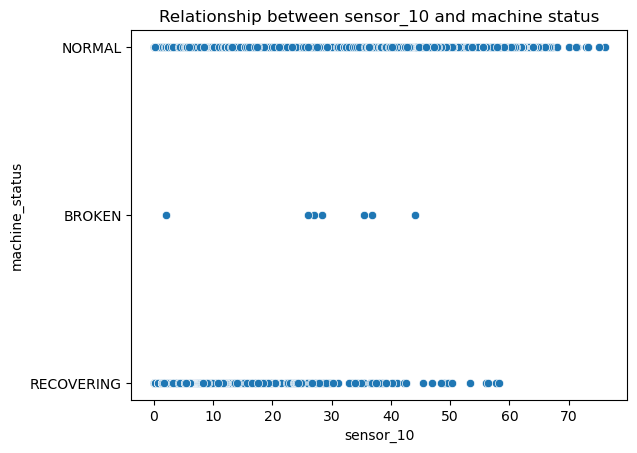

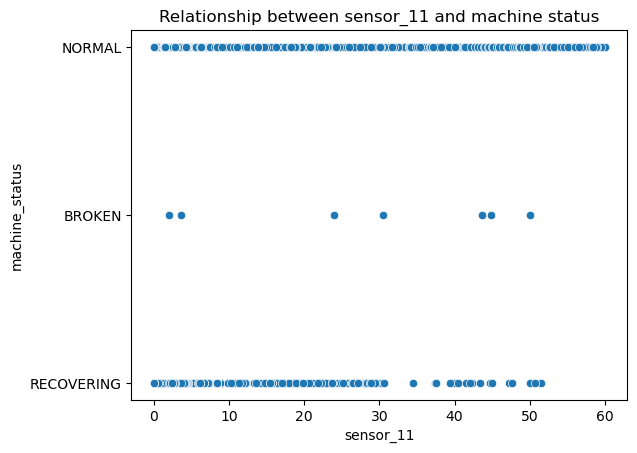

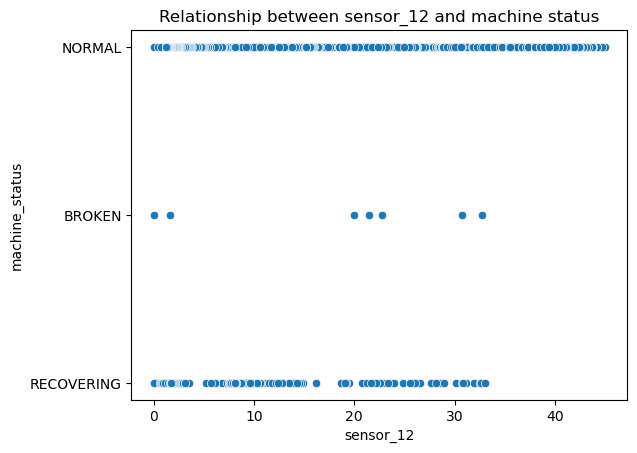

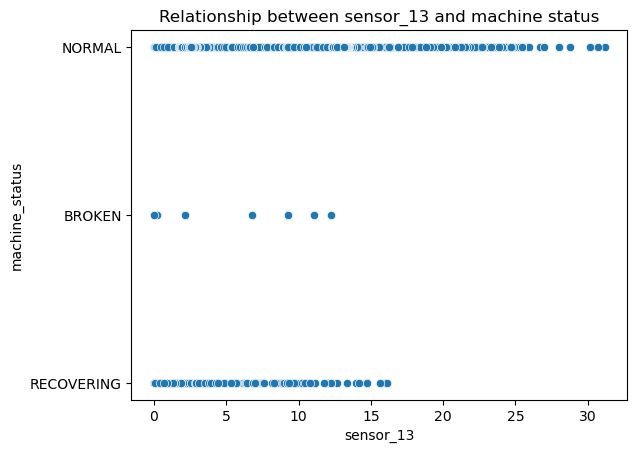

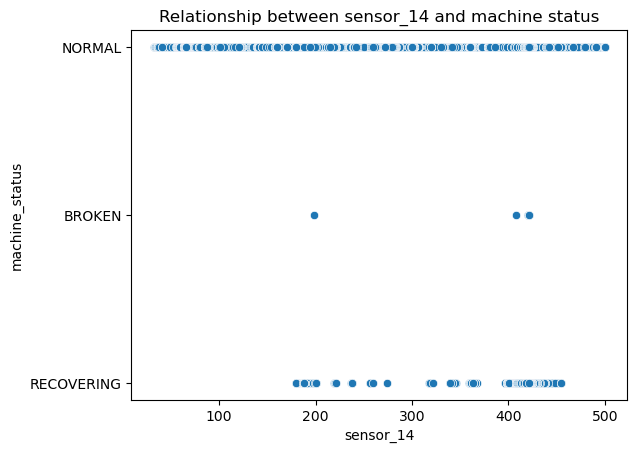

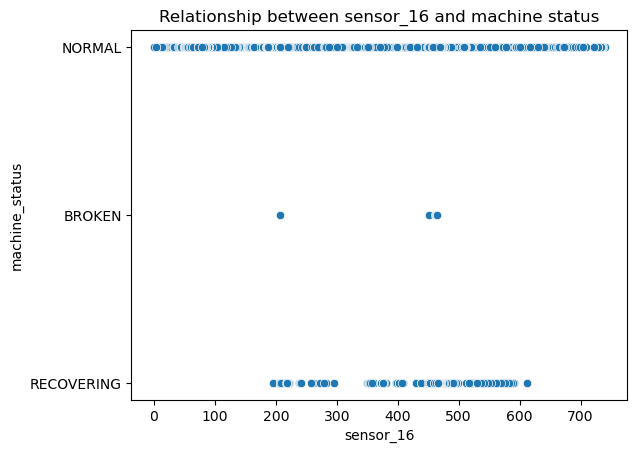

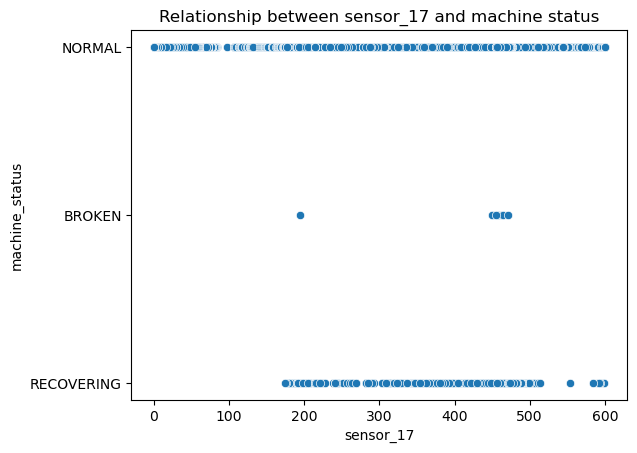

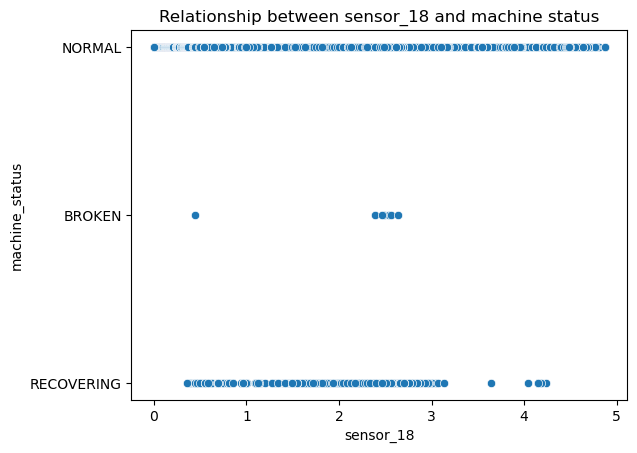

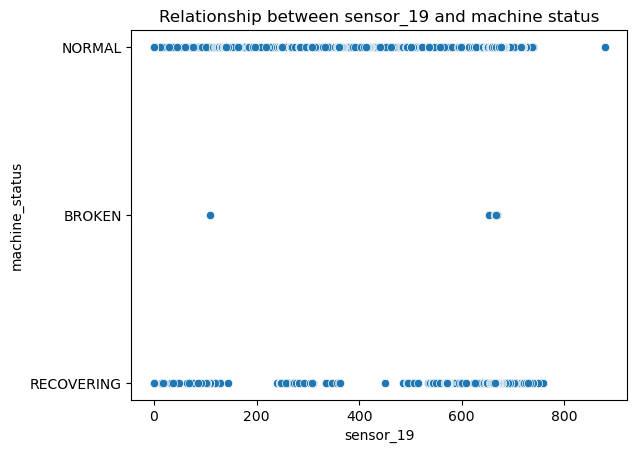

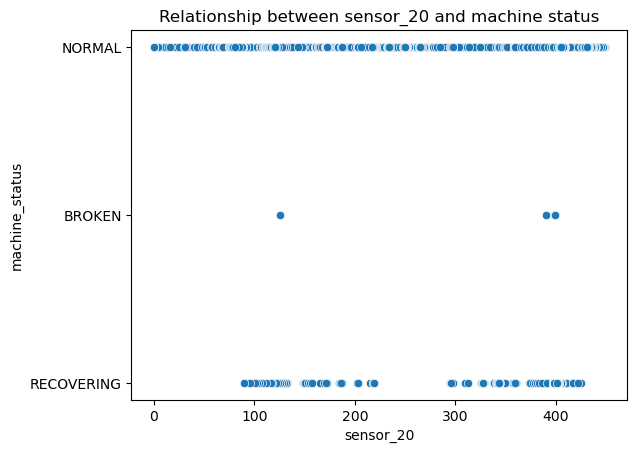

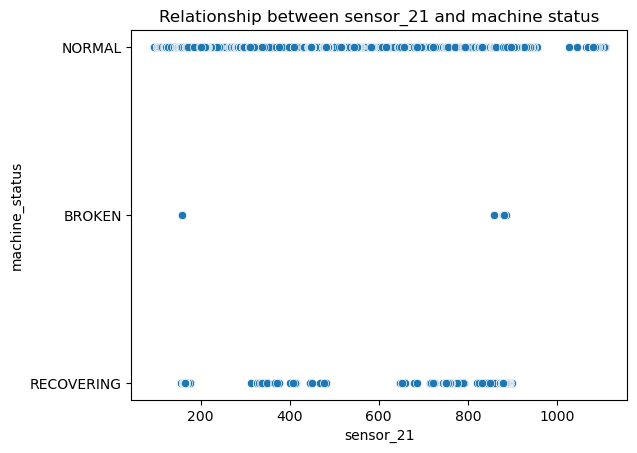

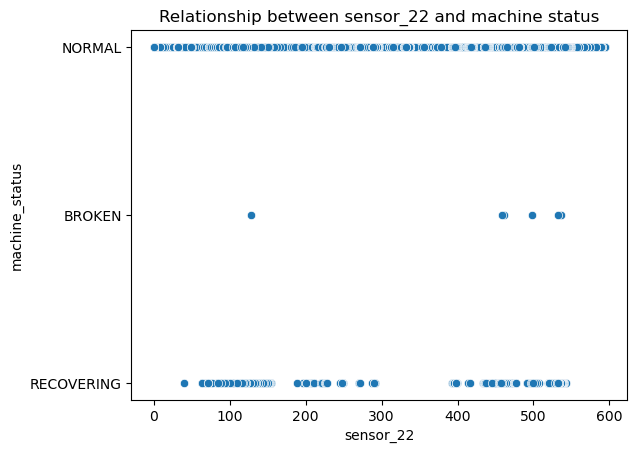

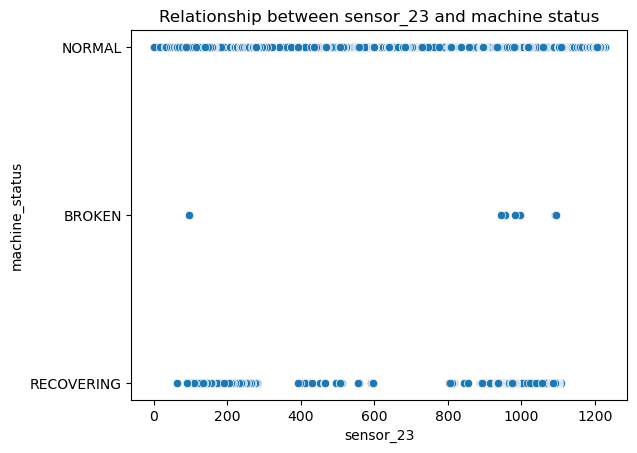

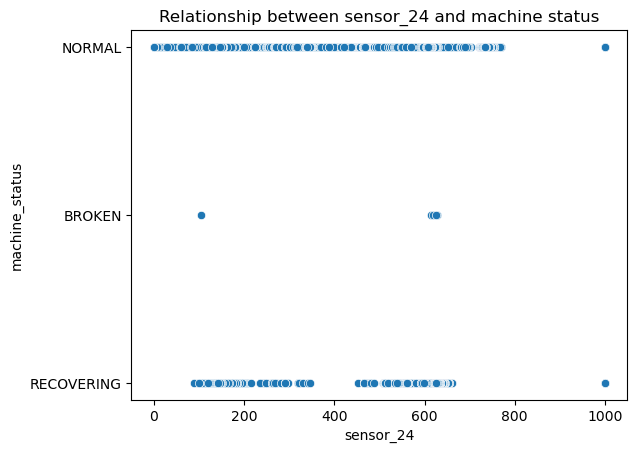

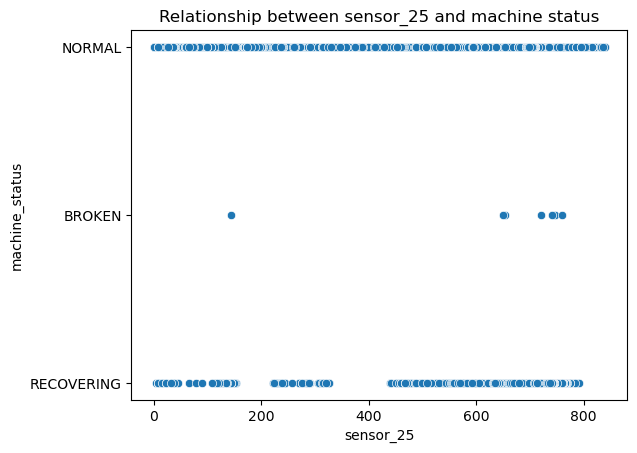

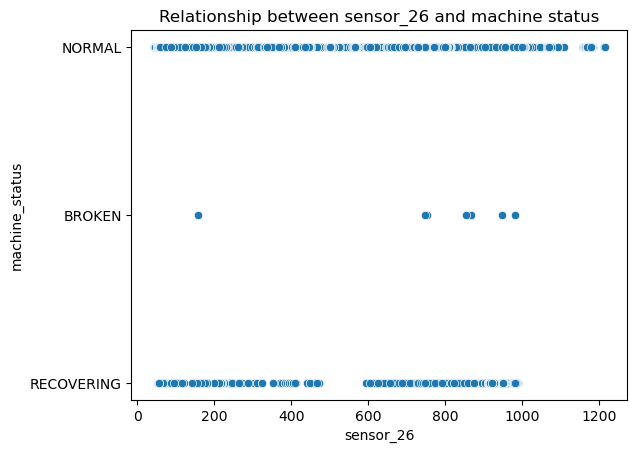

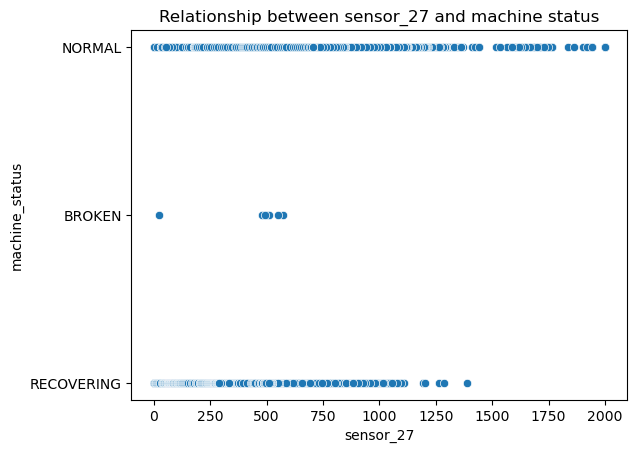

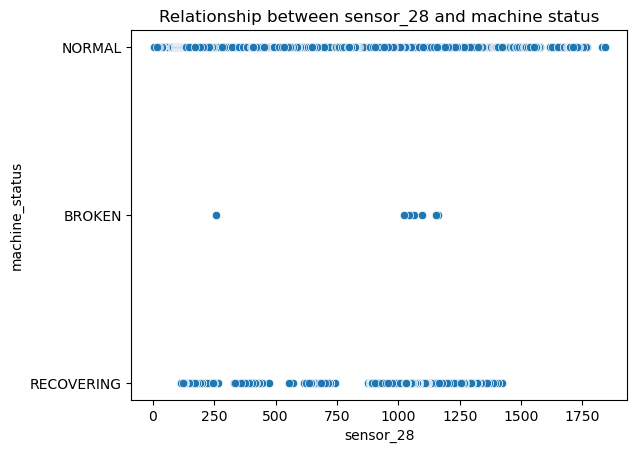

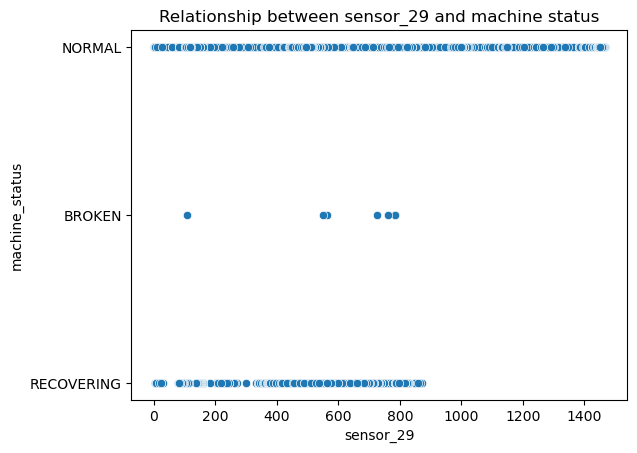

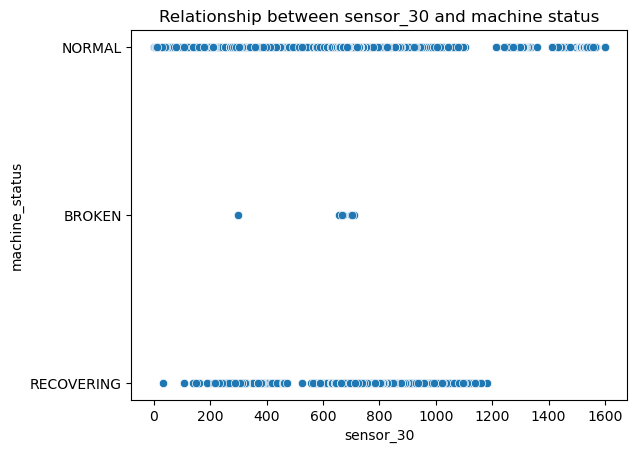

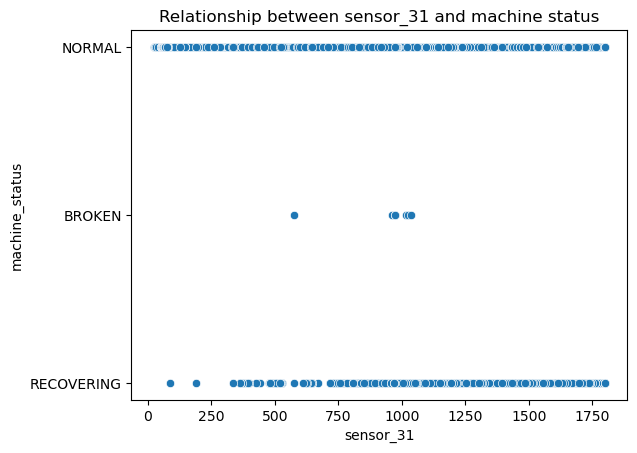

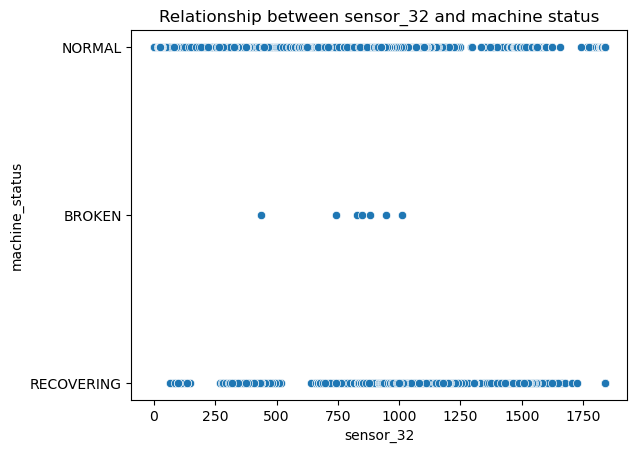

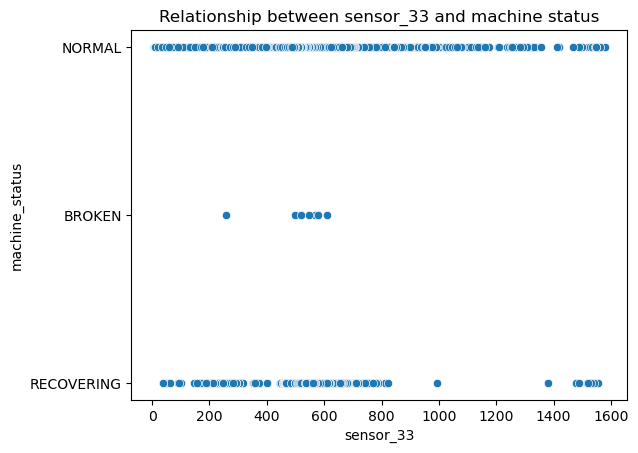

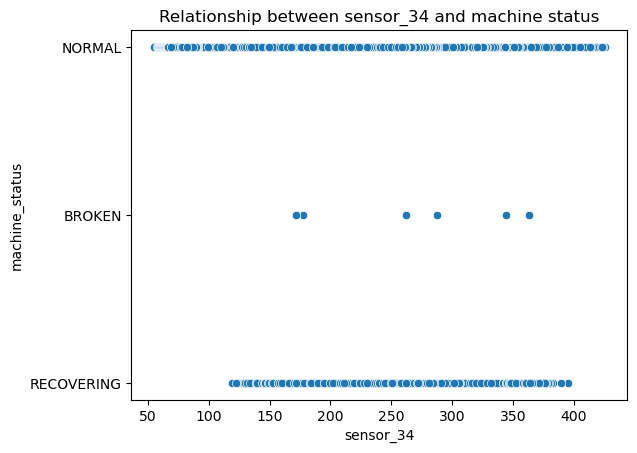

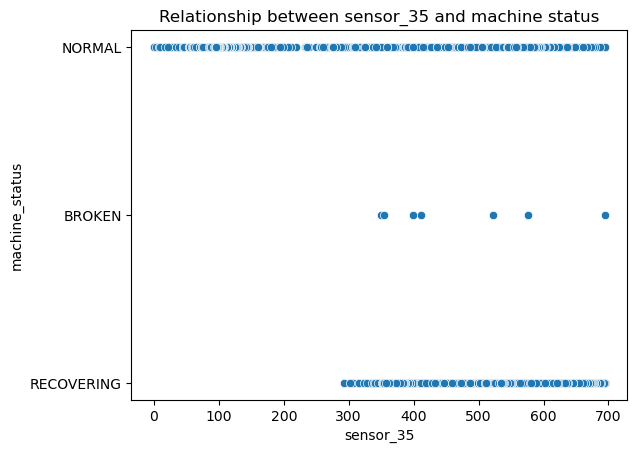

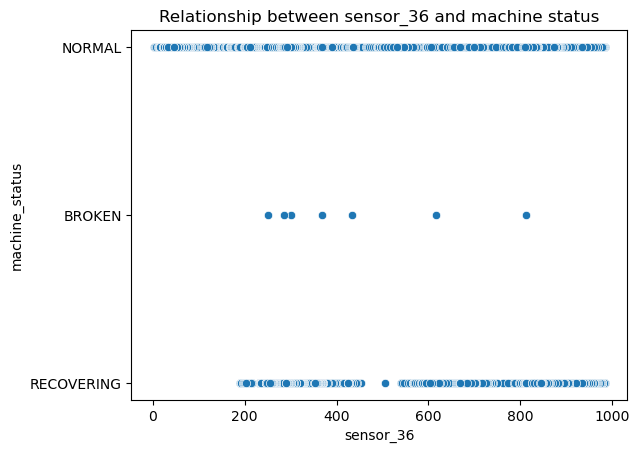

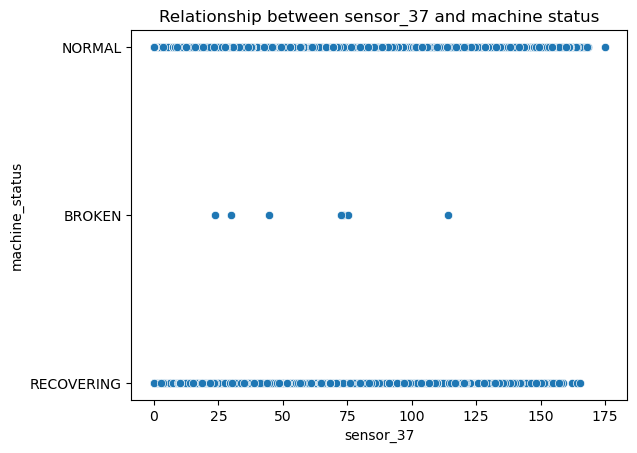

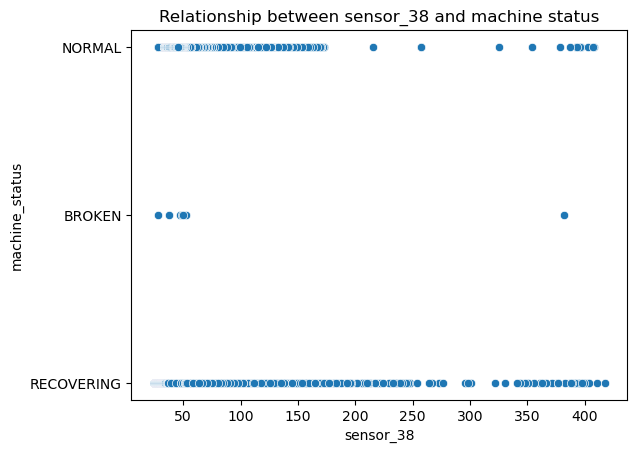

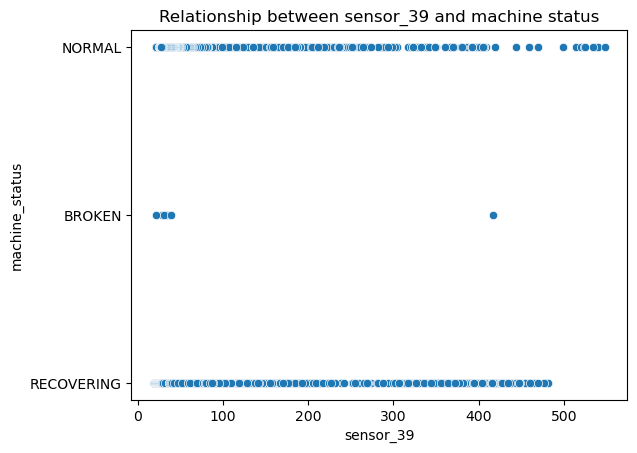

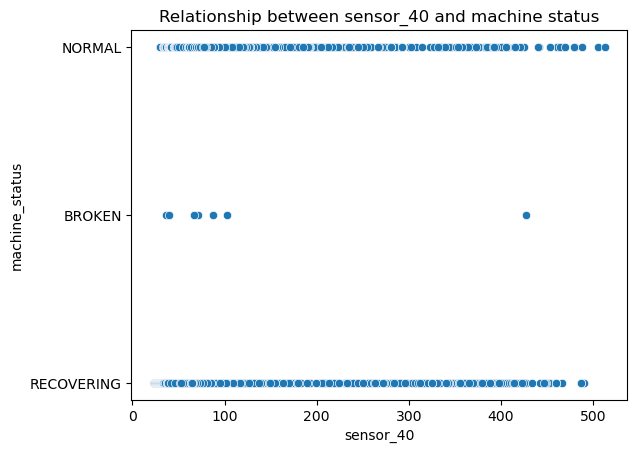

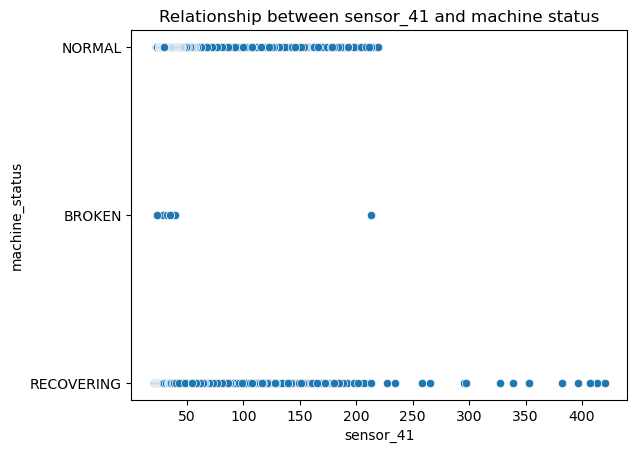

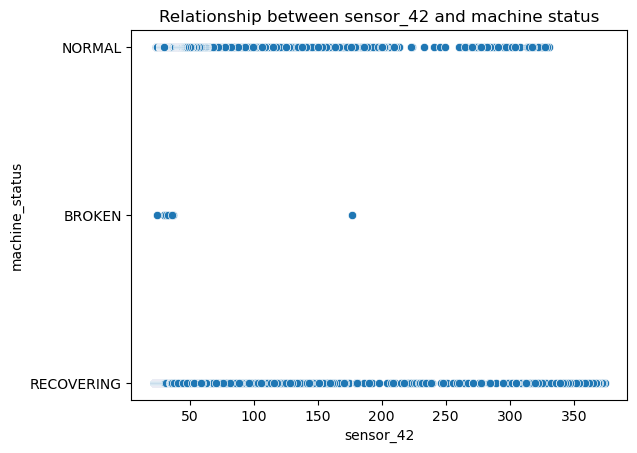

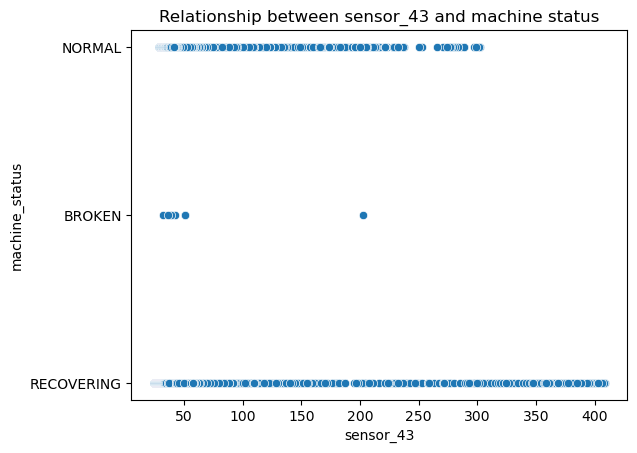

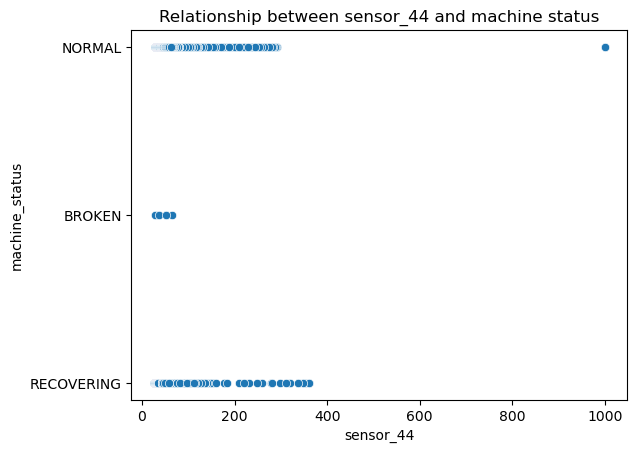

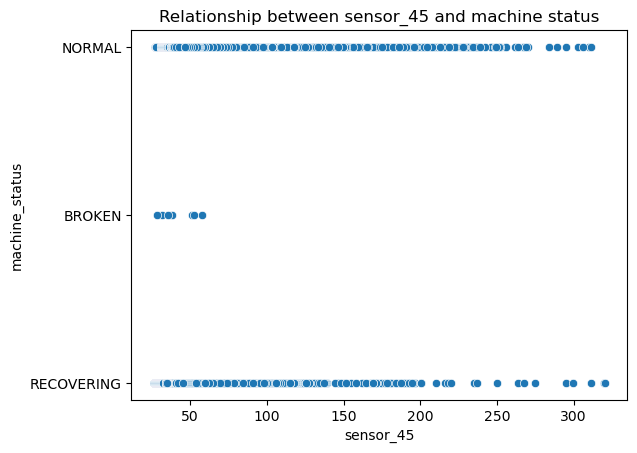

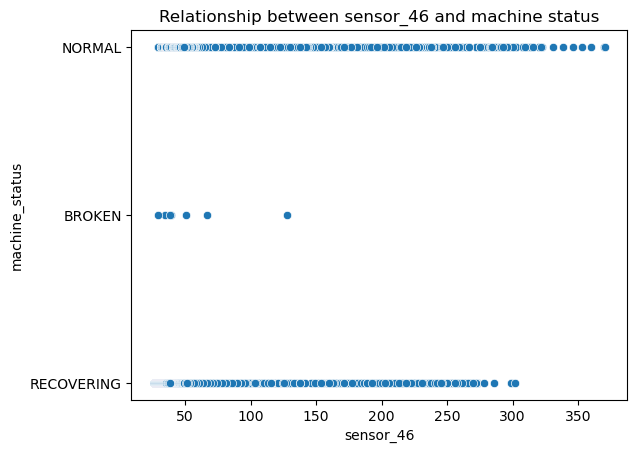

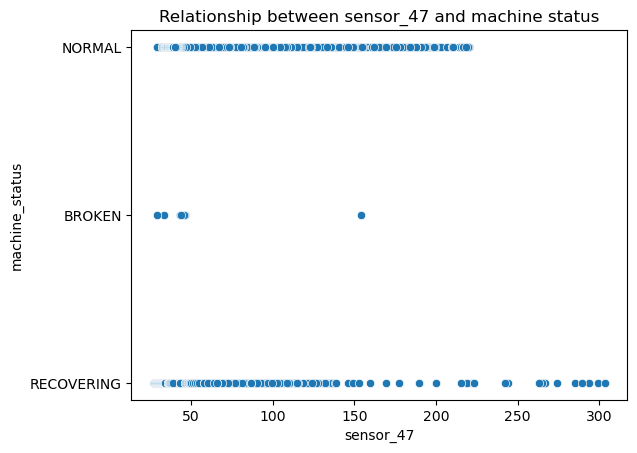

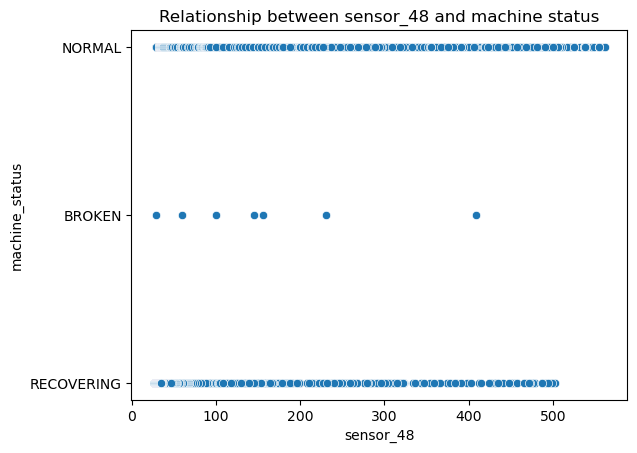

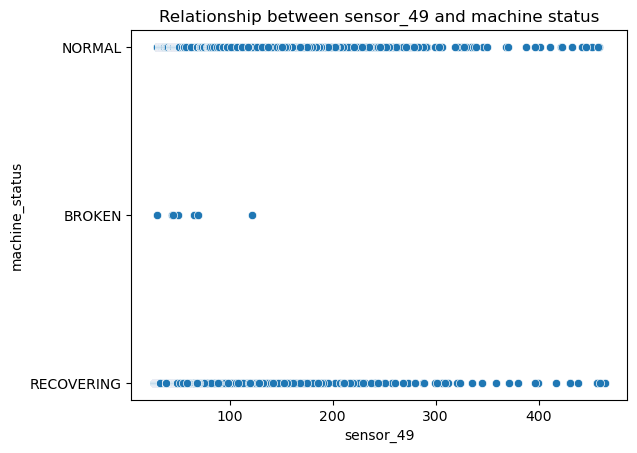

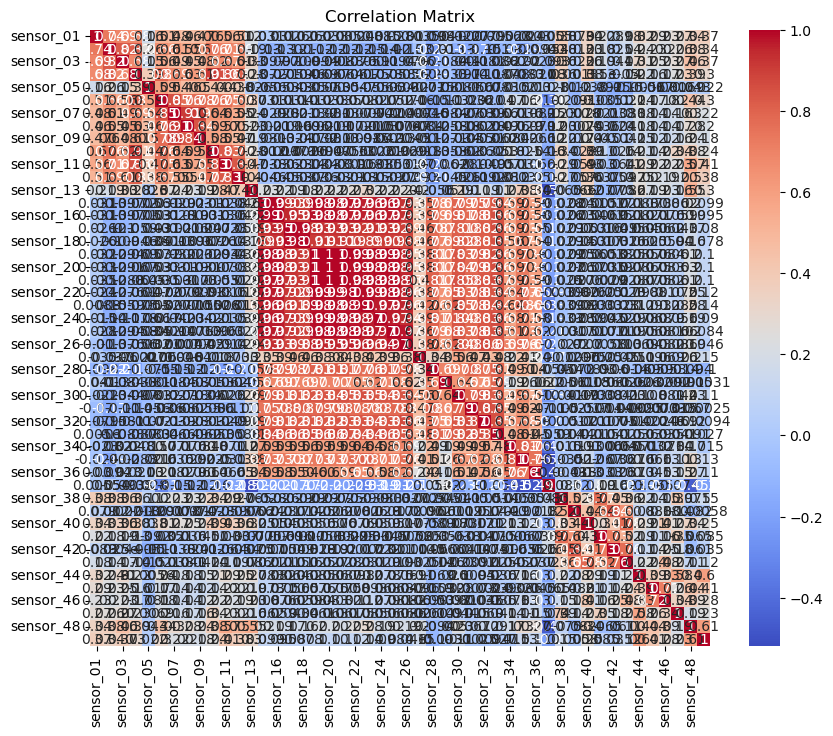

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the relationships between features and the target variable
for feature in data.columns[:-1]:
    plt.figure()
    sns.scatterplot(x=feature, y='machine_status', data=data)
    plt.title(f'Relationship between {feature} and machine status')
    plt.show()

# Investigate correlations between numeric features
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

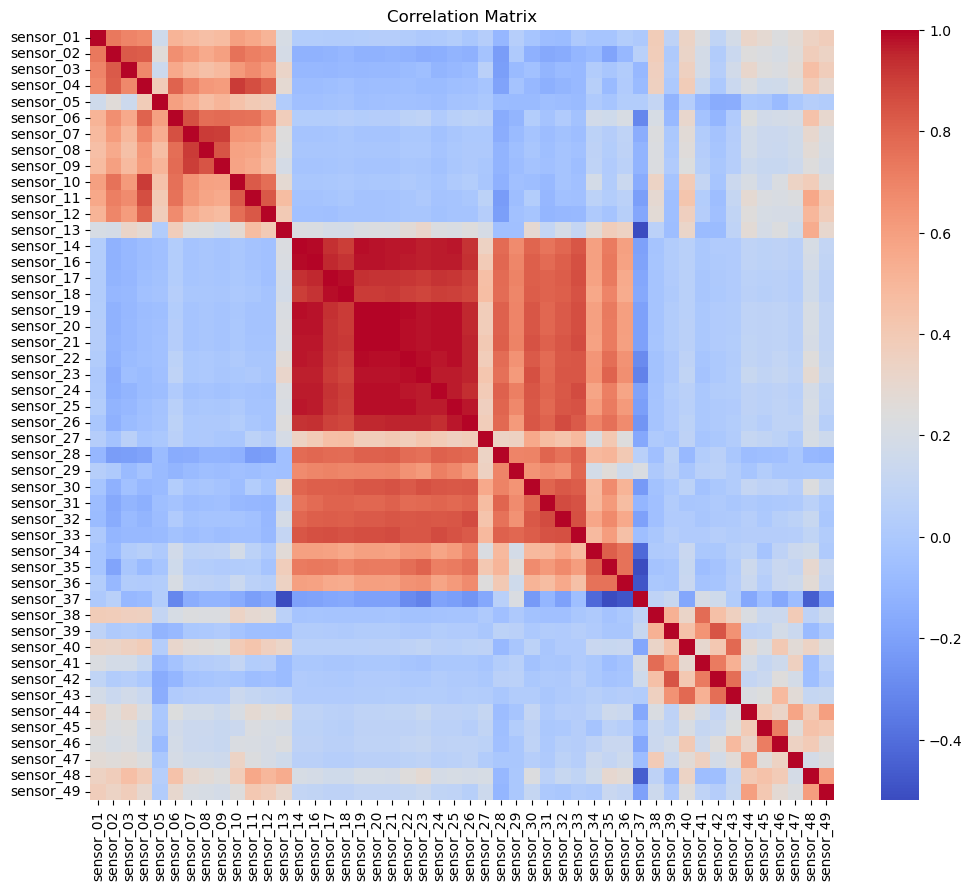

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import seaborn as sns


# Investigate correlations between numeric features
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')  # Set annot to False to hide values
plt.title('Correlation Matrix')
plt.show()


In [23]:
print(data.columns)

Index(['sensor_01', 'sensor_02', 'sensor_03', 'sensor_04', 'sensor_05',
       'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21',
       'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26',
       'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31',
       'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36',
       'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41',
       'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46',
       'sensor_47', 'sensor_48', 'sensor_49', 'machine_status'],
      dtype='object')


In [ ]:
## 3) Feature Engineering

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize or normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('machine_status', axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])
data_scaled['machine_status'] = data['machine_status']


In [28]:
# Create interaction features (if applicable)
data_scaled['sensor1_x_sensor2'] = data_scaled['sensor_01'] * data_scaled['sensor_02']

In [55]:
# Engineer additional features
data['sensor1_rolling_mean'] = data['sensor_01'].rolling(window=10).mean()
data['sensor2_trend'] = data['sensor_02'].diff()
data['sensor3_lag'] = data['sensor_03'].shift(1)

print(data.head(12))

    sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  sensor_06  \
0    47.09201    53.2118  46.310760   634.3750   76.45975   13.41146   
1    47.09201    53.2118  46.310760   634.3750   76.45975   13.41146   
2    47.35243    53.2118  46.397570   638.8889   73.54598   13.32465   
3    47.09201    53.1684  46.397568   628.1250   76.98898   13.31742   
4    47.13541    53.2118  46.397568   636.4583   76.58897   13.35359   
5    47.09201    53.1684  46.397568   637.6157   78.18568   13.41146   
6    47.04861    53.1684  46.397568   633.3333   75.81614   13.43316   
7    47.13541    53.1684  46.397568   630.6713   75.77331   13.25231   
8    47.09201    53.1684  46.397568   631.9444   74.58916   13.28848   
9    47.17882    53.1684  46.397568   641.7823   74.57428   13.38252   
10   47.48264    53.1250  46.397568   637.7314   76.05148   13.41146   
11   47.91666    53.1684  46.397568   635.6482   74.58654   13.41146   

    sensor_07  sensor_08  sensor_09  sensor_10  ...  sensor_44 

In [ ]:
## 4) Predictive Modeling

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = data_scaled.drop('machine_status', axis=1)
y = data_scaled['machine_status']

# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train different models
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    HistGradientBoostingClassifier()
]

for model in models:
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    print(f'Model: {type(model).__name__}')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('------------------------------')

C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression
Accuracy: 0.9979802106027597
              precision    recall  f1-score   support

      NORMAL       1.00      1.00      1.00     41243
  RECOVERING       0.98      0.99      0.98      2821

    accuracy                           1.00     44064
   macro avg       0.99      0.99      0.99     44064
weighted avg       1.00      1.00      1.00     44064

------------------------------
Model: DecisionTreeClassifier
Accuracy: 0.9997957516339869


C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      BROKEN       0.00      0.00      0.00         0
      NORMAL       1.00      1.00      1.00     41243
  RECOVERING       1.00      1.00      1.00      2821

    accuracy                           1.00     44064
   macro avg       0.67      0.67      0.67     44064
weighted avg       1.00      1.00      1.00     44064

------------------------------
Model: RandomForestClassifier
Accuracy: 0.999931917211329


C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      BROKEN       0.00      0.00      0.00         0
      NORMAL       1.00      1.00      1.00     41243
  RECOVERING       1.00      1.00      1.00      2821

    accuracy                           1.00     44064
   macro avg       0.67      0.67      0.67     44064
weighted avg       1.00      1.00      1.00     44064

------------------------------
Model: HistGradientBoostingClassifier
Accuracy: 0.9948937908496732


C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      BROKEN       0.00      0.00      0.00         0
      NORMAL       1.00      1.00      1.00     41243
  RECOVERING       0.99      0.97      0.98      2821

    accuracy                           0.99     44064
   macro avg       0.66      0.66      0.66     44064
weighted avg       1.00      0.99      1.00     44064

------------------------------


C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
## 5) Model Evaluation and Selection 

In [34]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
import numpy as np

# Impute missing values in X and y
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = y

# Perform cross-validation
cross_val_scores = []
for model in models:
    scores = cross_val_score(model, X_imputed, y_imputed, cv=5)
    cross_val_scores.append(scores)
    print(f'Model: {type(model).__name__}')
    print('Cross-validation scores:', scores)
    print('Mean score:', scores.mean())
    print('------------------------------')

# Select the best model based on cross-validation scores
best_model_idx = np.argmax([scores.mean() for scores in cross_val_scores])
best_model = models[best_model_idx]
print('Best model:', type(best_model).__name__)

C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model: LogisticRegression
Cross-validation scores: [0.9845679  0.97857662 0.98148148 0.99058188 0.99732208]
Mean score: 0.986505991285403
------------------------------
Model: DecisionTreeClassifier
Cross-validation scores: [0.98999183 0.97673838 0.97939361 0.99478032 0.98885712]
Mean score: 0.9859522512708787
------------------------------
Model: RandomForestClassifier
Cross-validation scores: [0.99244281 0.99071805 0.98204884 0.99482571 0.99720861]
Mean score: 0.9914488017429195
------------------------------
Model: KNeighborsClassifier
Cross-validation scores: [0.97374274 0.98204884 0.9849537  0.99194354 0.99630084]
Mean score: 0.9857979302832245
------------------------------
Model: SVC
Cross-validation scores: [0.97907589 0.97326616 0.99412219 0.99069535 0.99641431]
Mean score: 0.9867147785039941
------------------------------
Model: GaussianNB
Cross-validation scores: [0.9663671  0.59084513 0.91033497 0.97344771 0.98168573]
Mean score: 0.8845361292665214
-------------------------